Que 1-> What is the difference between multithreading and multiprocessing?

Ans Multithreading:- Multithreading involves a single process dividing its execution into multiple independent threads.

Shared Memory: All threads within the same process share the same memory space, making data access and communication very fast and efficient.

Concurrency: Threads are typically managed by the operating system's scheduler to achieve concurrency, meaning they take turns using a single CPU core. They can achieve true parallelism only if the system has multiple cores and the threads are scheduled to run simultaneously on different cores.

Use Case: Often preferred for tasks that are I/O-bound (waiting for external resources like network or disc), as one thread can wait while others continue processing.

Multiprocessing: - Multiprocessing involves running multiple independent processes simultaneously.

Separate Memory: Each process has its own dedicated, private memory space. This isolation provides excellent fault tolerance and security, as a problem in one process won't corrupt the memory of another.

Parallelism: Processes are ideal for achieving true parallelism across multiple CPU cores, as each process can be assigned to its own core.

Use Case: Best for tasks that are CPU-bound (heavy computation), where the goal is to utilize all available processing power simultaneously.



Que 2-> What are the challenges associated with memory management in Python?

Ans  Memory management in Python is largely automatic, relying on a private heap and a system that includes reference counting and a generational garbage collector. However, this automated approach presents several specific challenges for developers:

1. Understanding and Controlling the Garbage Collector
The primary challenge is that developers have limited direct control over when the Garbage Collector (GC) runs.
Non-Deterministic Finalisation: The GC's execution schedule isn't always predictable. This means you can't guarantee when resources held by an object will be released, which can be critical for managing file handles, network connections, or database connections.
Performance Spikes: When the generational GC runs, it can temporarily pause the execution of the Python program (known as Stop-the-World). For high-frequency or real-time systems, these unpredictable pauses can introduce latency and impact performance.
Tuning Difficulty: While the GC module allows some control (like setting collection thresholds), tuning these parameters to maximize performance without causing excessive memory consumption is complex and often system-specific.

2. Memory Bloating and Fragmentation
Python objects often consume more memory than their counterparts in lower-level languages due to the overhead of the CPython structure (e.g., storing type information, reference count, and internal pointers).
Object Overhead: Every object in Python (even a small integer) carries a significant amount of overhead. Creating millions of small objects can lead to significant memory bloat.
Memory Fragmentation: While Python's memory allocator (PyMalloc) tries to minimize this, rapid allocation and deallocation of objects of different sizes can still lead to the heap memory becoming fragmented, meaning there's plenty of free space, but not enough contiguous space for a large allocation, potentially leading to increased memory usage overall.

3. Circular References and Reference Cycles
Although Python's main memory management mechanism is Reference Counting (an object is freed when its reference count drops to zero), it cannot handle circular references.
The Problem: A circular reference occurs when two or more objects hold references to each other, forming a closed loop (e.g., a references b, and b references a). Even if no other part of the program references a or b, their mutual references keep their counts above zero, preventing the objects from ever being freed.
The GC's Role: The Generational Garbage Collector exists specifically to find and break these reference cycles. However, if the GC is disabled or the cycle involves objects with custom __del__ methods (finalizers), the objects might not be collected, leading to memory leaks.

4. Integration with External Libraries (C/C++ Extensions)
When using C or C++ extensions (like those in NumPy or Pandas), developers face challenges related to the interaction between the two memory systems:
Crossing the Boundary: Python objects passed to C extensions must be handled carefully. Developers must manually manage the Python reference counts using functions like Py_INCREF() and Py_DECREF() to prevent leaks or premature deallocation.
External Memory: Libraries like NumPy often allocate large blocks of memory outside the Python heap using the operating system's memory allocator (e.g., malloc). This memory is invisible to Python's GC, requiring the developer or the library to implement custom strategies to ensure the memory is released when the referencing Python object is destroyed.


In [1]:
# Que 3 # Que3 Write a Python program that logs an error message to a log file when a division by zero exception occurs.

import logging

# Configure logging
logging.basicConfig(filename='error.log', level=logging.ERROR, format='%(asctime)s - %(levelname)s - %(message)s')

def safe_division(numerator, denominator):
  """Performs division and logs an error if division by zero occurs."""
  try:
    result = numerator / denominator
    return result
  except ZeroDivisionError:
    logging.error(f"Attempted division by zero with numerator: {numerator}")
    return None

# Example usage
print(safe_division(10, 2))
print(safe_division(5, 0))
print(safe_division(8, 4))

ERROR:root:Attempted division by zero with numerator: 5


5.0
None
2.0


In [2]:
# Que 4 -> Write a Python program that reads from one file and writes its content to another file.

def copy_file_content(source_file, destination_file):
  """Reads content from source_file and writes it to destination_file."""
  try:
    with open(source_file, 'r') as infile, open(destination_file, 'w') as outfile:
      content = infile.read()
      outfile.write(content)
    print(f"Content from '{source_file}' successfully copied to '{destination_file}'.")
  except FileNotFoundError:
    print(f"Error: One of the files was not found.")
  except Exception as e:
    print(f"An error occurred: {e}")

# Example usage:
# Create a dummy source file
with open("source.txt", "w") as f:
  f.write("This is the content of the source file.\n")
  f.write("This is the second line.")

# Copy the content
copy_file_content("source.txt", "destination.txt")

# Verify the content of the destination file
with open("destination.txt", "r") as f:
  print("\nContent of destination.txt:")
  print(f.read())

Content from 'source.txt' successfully copied to 'destination.txt'.

Content of destination.txt:
This is the content of the source file.
This is the second line.


In [3]:
# Que 5 Que 5 -> Write a program that handles both IndexError and KeyError using a try-except block.
def access_element(data, index=None, key=None):
  """
  Accesses an element from a list or dictionary and handles IndexError or KeyError.
  """
  try:
    if index is not None:
      print(f"Accessing element at index {index}: {data[index]}")
    if key is not None:
      print(f"Accessing element with key '{key}': {data[key]}")
  except IndexError:
    print(f"Error: Index {index} is out of range.")
  except KeyError:
    print(f"Error: Key '{key}' not found.")
  except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Example usage:
my_list = [1, 2, 3]
my_dict = {"a": 1, "b": 2}

print("--- Testing with a list ---")
access_element(my_list, index=1)  # Valid index
access_element(my_list, index=5)  # IndexError

print("\n--- Testing with a dictionary ---")
access_element(my_dict, key="a")  # Valid key
access_element(my_dict, key="c")  # KeyError

print("\n--- Testing with both index and key (will handle the first exception encountered) ---")
access_element(my_list, index=1, key="a")
access_element(my_list, index=5, key="c") # Will raise IndexError first

--- Testing with a list ---
Accessing element at index 1: 2
Error: Index 5 is out of range.

--- Testing with a dictionary ---
Accessing element with key 'a': 1
Error: Key 'c' not found.

--- Testing with both index and key (will handle the first exception encountered) ---
Accessing element at index 1: 2
An unexpected error occurred: list indices must be integers or slices, not str
Error: Index 5 is out of range.


Question 7:Explain the difference between apply() and map() in Pandas.

Ans Here are the key differences between NumPy arrays and Python lists:

**1. Data Type:**

*   **NumPy Arrays:** Store elements of the same data type (homogeneous). This allows for more efficient storage and operations.
*   **Python Lists:** Can store elements of different data types (heterogeneous).

**2. Performance:**

*   **NumPy Arrays:** Generally much faster for numerical operations due to their homogeneous nature and optimized underlying C implementation. They are particularly efficient for large datasets.
*   **Python Lists:** Slower for numerical operations, especially with large datasets, due to the overhead of checking the data type of each element.

**3. Functionality:**

*   **NumPy Arrays:** Offer a wide range of mathematical functions and operations that can be applied to the entire array at once (vectorization). They are fundamental for numerical computing, scientific computing, and data analysis.
*   **Python Lists:** Have general-purpose methods for adding, removing, and manipulating elements. They are more flexible for storing diverse data but lack the built-in mathematical capabilities of NumPy arrays.

**4. Memory Usage:**

*   **NumPy Arrays:** More memory-efficient for storing numerical data because they store elements contiguously and don't need to store type information for each element.
*   **Python Lists:** Can consume more memory due to the overhead of storing type information for each element and the potential for non-contiguous memory allocation.

**5. Size Mutability:**

*   **NumPy Arrays:** Fixed size at creation. While you can create new arrays with different sizes, you cannot change the size of an existing array in-place.
*   **Python Lists:** Dynamically sized. You can easily add or remove elements, changing the size of the list.



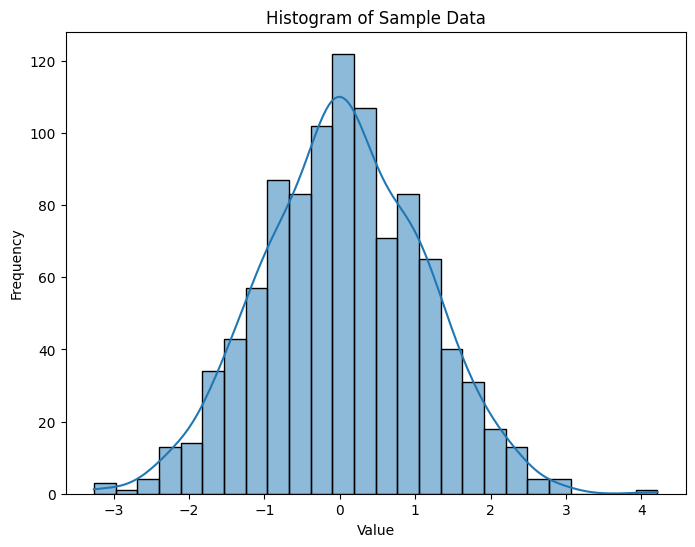

In [4]:
#Question 8: Create a histogram using Seaborn to visualize a distribution.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data
data = np.random.randn(1000)

# Create the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data, kde=True)
plt.title('Histogram of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [5]:
#Que 9 Use Pandas to load a CSV file and display its first 5 rows.
import pandas as pd
import os

# Create a dummy CSV file
csv_data = {'col1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'col2': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']}
dummy_df = pd.DataFrame(csv_data)
dummy_csv_path = 'dummy.csv'
dummy_df.to_csv(dummy_csv_path, index=False)

# Check if the dummy file was created
if os.path.exists(dummy_csv_path):
  print(f"'{dummy_csv_path}' created successfully.")
else:
  print(f"Failed to create '{dummy_csv_path}'.")

# Load the CSV file into a pandas DataFrame
try:
  df = pd.read_csv(dummy_csv_path)

  # Display the first 5 rows
  print("\nFirst 5 rows of the DataFrame:")
  display(df.head())

except FileNotFoundError:
  print(f"Error: The file '{dummy_csv_path}' was not found.")
except Exception as e:
  print(f"An error occurred: {e}")

'dummy.csv' created successfully.

First 5 rows of the DataFrame:


,col1,col2
0,1,A
1,2,B
2,3,C
3,4,D
4,5,E


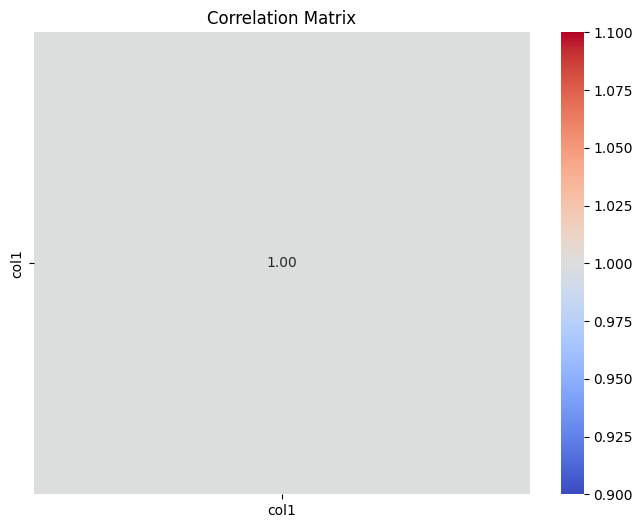

In [7]:
# Que 10 Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include='number').corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()